# Project: Investigate - TMdb Movie Dataset


## Introduction 

For the data analysis, I chose a dataset named TMdb movie dataset available on [Toggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, budget, rating, year of release and revenue. 

A great dataset to start digging on the questions for the movies that are higg grossing, the likes of genres by people, famous directors, highly rated movies etc. 

#### What we are trying to find out? 

The right questions that can help us to find insights in the dataset: 

1. Highest and lowest Grossing movie  
3. Highest and lowest runtime 
4. Highest and lowest budget movies
5. Number of movies of various directors 

What kinds of properties are associated with movies that have high revenues?

1. Genres that had high revenues
2. Average duration of the movie that have high revenues
3. High revenues movie’s average budget 
4. Average rating of the movies with highest revenues 
5. High revenues movie with profit 

In [209]:
# importing the packages that we need for our data analysis 
import numpy as np 
import pandas as pd
import matplotlib .pyplot as plt 
%matplotlib inline 

## Data Wrangling 

Data Wrangling is the second step towards our data analysis process after the proposed questions to find our insights. It includes 
1. Gathering the data
2. Assessing our data
3. Cleaning our data

#### Gathering our data: 

In [77]:
#Loading our data into variable df_movie
df_movie = pd.read_csv('tmdb-movies.csv')

#### Assessing our data: 

In [78]:
# To assess our data, we will try to see the columns and first five rows
df_movie.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [79]:
df_movie.shape

(10866, 21)

In [80]:
# Information about the no. of columns, name of the columns and their data types
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [81]:
df_movie.duplicated().value_counts()

False    10865
True         1
dtype: int64

Observations after accessing our data:
1. There are 21 columns and 10866 rows. 
2. Some of the columns are useless for our analysis. 
3. Few missing values are present in the dataset. 
4. Vote count differs a lot from movie-to-movie, we can't tell the popularity directly based on average vote counts.
5. There is one duplicate row in the entire data set.

### Cleaning our Data: 
1. Removing unnecessary columns for our analysis, like, id, imdb_id, overview, homepage, keywords and tagline.
2. Correcting all the NaN elements.
3. We need to remove the duplicate row present in our data set.
4. Converting release date into date format.

#### 1. let us remove all the columns that are not needed:
id, imdb_id, homepage, tagline, keywords, overview, budget_adj, revenue_adj, popularity, production_companies

In [82]:
df_movie.drop(['id','imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj','popularity'],axis='columns',inplace=True)

In [83]:
df_movie.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [84]:
df_movie.drop(['production_companies',axis='columns',inplace=True)

In [85]:
df_movie.head(2)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [86]:
df_movie.isnull().any()

budget            False
revenue           False
original_title    False
cast               True
director           True
runtime           False
genres             True
release_date      False
vote_count        False
vote_average      False
release_year      False
dtype: bool

In [87]:
# We can see there are some null values in cast, director and Genre. 
#We will have to remove the rows with the null values. 
df_movie.dropna(inplace=True)
df_movie

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966
10862,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966
10863,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966
10864,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966


In [88]:
# We can see above that there are many rows with 0 revenues and budgets. 
# This means that these movies are either not released or there is a missing value.
# creating a seperate list of revenue and budget column
temp=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df_movie[temp] = df_movie[temp].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df_movie.dropna(subset = temp, inplace = True)
df_movie

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...
10822,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,6/21/66,74,7.5,1966
10828,3000000.0,1.300000e+07,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,7/13/66,46,6.3,1966
10829,4653000.0,6.000000e+06,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,12/17/66,36,6.9,1966
10835,12000000.0,2.000000e+07,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966


#### 3. Removing Duplicate values

In [89]:
# Removing the duplicate value
df_movie.drop_duplicates(inplace=True)

# The final dataset now
df_movie.shape
print("We have {rows} total movies for analysis".format(rows=df_movie.shape[0]))

We have 3849 total movies for analysis


#### 4. Converting release date into date format

In [91]:
#Conversion of release date into date format
df_movie.release_date=pd.to_datetime(df_movie['release_date'])

In [93]:
# Checking the updated data types of all columns
df_movie.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [99]:
if 0 in df_movie.runtime:
    print("exists 0")

exists 0


#### From the above statement, we can observe that even the runtime has 0 value. It states that movie is not released. Therefore, we need to clean these rows as well.  

#### 5. Removing 0's in runtime

In [134]:
df_movie['runtime'] = df_movie['runtime'].replace(0, np.NaN)
df_movie.dropna(inplace = True)

In [135]:
df_movie

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.363529e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,2.284364e+08
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.852382e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.868178e+09
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.316249e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,2066-06-21,74,7.5,1966,2.623669e+07
10828,3000000.0,1.300000e+07,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,2066-07-13,46,6.3,1966,1.000000e+07
10829,4653000.0,6.000000e+06,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,2066-12-17,36,6.9,1966,1.347000e+06
10835,12000000.0,2.000000e+07,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966,8.000000e+06


Converting the datatypes of budget and revenue 

In [145]:
df_movie = df_movie.astype({"budget": int, "revenue": int})
df_movie.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
profit                   float64
dtype: object

## Data Exploration 

Data findings, learning more about the data, analysing its characteristing and properties, if found any problem we will go back to the previous step

### 1. Highest and lowest grossing movie in paticular years

To Calculate profit, we need to subtract revenue from the budget, We will have an addition of a column, then finding highest and lowest grossing movies 


In [154]:
# New Column of profit 
df_movie['profit']=df_movie['revenue']-df_movie['budget']
df_movie.head(1)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810


In [155]:
highest_gross= df_movie['profit'].idxmax()
high=pd.DataFrame(df_movie.loc[highest_gross])
print(high)

lowest_gross= df_movie['profit'].idxmin()
low=pd.DataFrame(df_movie.loc[lowest_gross])
print(low)

                                                             1386
budget                                                  237000000
revenue                                                2781505847
original_title                                             Avatar
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                            James Cameron
runtime                                                       162
genres                   Action|Adventure|Fantasy|Science Fiction
release_date                                  2009-12-10 00:00:00
vote_count                                                   8458
vote_average                                                  7.1
release_year                                                 2009
profit                                                 2544505847
                                                             2244
budget                                                  425000000
revenue   

From the observation, we see revenue and profit is not printed properly, we will go back to data wrangling and get the budget and revenue values fixed. 


### 2. Longest and shortest runtime

In [178]:
longest_runtime= df_movie['runtime'].idxmax()
long=pd.DataFrame(df_movie.loc[longest_runtime])
print(long, "\n\n")

shortest_runtime= df_movie['runtime'].idxmin()
short=pd.DataFrame(df_movie.loc[shortest_runtime])
print(short)

                                                             2107
budget                                                   18000000
revenue                                                    871279
original_title                                             Carlos
cast            Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                          Olivier Assayas
runtime                                                       338
genres                               Crime|Drama|Thriller|History
release_date                                  2010-05-19 00:00:00
vote_count                                                     35
vote_average                                                  6.2
release_year                                                 2010
profit                                                  -17128721 


                                                             5162
budget                                                         10
revenue

### 3. Highest nd lowest budget movie 

In [179]:
highest_budget= df_movie['budget'].idxmax()
high_b=pd.DataFrame(df_movie.loc[highest_budget])
print(high_b, "\n\n")

lowest_budget= df_movie['budget'].idxmin()
low_b=pd.DataFrame(df_movie.loc[lowest_budget])
print(low_b)

                                                             2244
budget                                                  425000000
revenue                                                  11087569
original_title                                  The Warrior's Way
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                               Sngmoo Lee
runtime                                                       100
genres                  Adventure|Fantasy|Action|Western|Thriller
release_date                                  2010-12-02 00:00:00
vote_count                                                     74
vote_average                                                  6.4
release_year                                                 2010
profit                                                 -413912431 


                                                             2618
budget                                                          1
revenue

### 4. Number of movies of a particular director

In [206]:
movie_director= df_movie.groupby(['director']).original_title.count()
print(movie_director)
print("The director with maximum movies is....",movie_director.idxmax(), "with total ",movie_director.max(),'movies')


director
 FrÃ©dÃ©ric Jardin               1
A.R. Murugadoss                  1
Aaron Blaise|Robert Walker       1
Aaron Norris                     1
Aaron Seltzer|Jason Friedberg    1
                                ..
Zack Snyder                      6
Zal Batmanglij                   1
Zana Briski|Ross Kauffman        1
Ãlex de la Iglesia               1
Ã‰mile Gaudreault                1
Name: original_title, Length: 1710, dtype: int64
The director with maximum movies is.... Steven Spielberg with total  27 movies


We conclude from above that Director Steven Spielberg directed the highest number of movies from the dataset. 

### Properties that are associated with high revenues 

### 5. Profitable movies with respect to year of release

2015

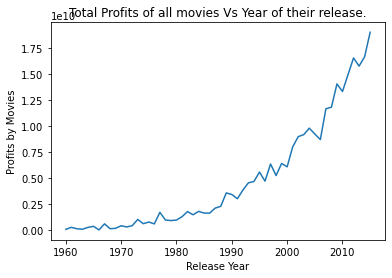

In [204]:
year_profit_sum=df_movie.groupby(['release_year'])['profit'].sum()
plt.xlabel('Release Year')
#on y-axis
plt.ylabel('Profits by Movies')
#title of the line plot
plt.title('Total Profits of all movies Vs Year of their release.')
plt.plot(year_profit_sum)
year_profit_sum.idxmax()

#### Conclusion from the above code is that 2015 is the year of most profitable movies calculated graphically and numerically. 

### 6. Successful Genres

In [207]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = df_movie[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Drama        1753
Comedy       1357
Thriller     1203
Action       1085
Adventure     749
dtype: int64

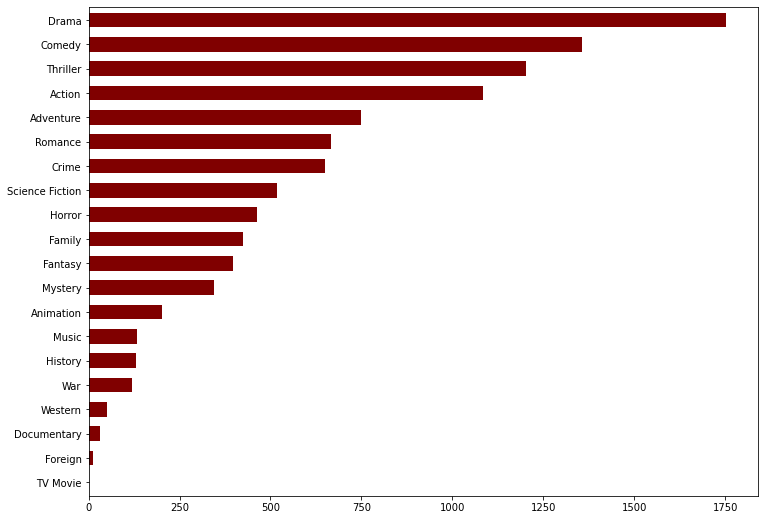

In [218]:
#to put the values in ascending order
count.sort_values(ascending = True, inplace= True)

# Representing the successful genres graphically
fig=count.plot.barh(color='maroon',width=0.6)
fig.figure.set_size_inches(12, 9)
plt.show()

#### Conclusion from above graph and numeric we can say that Drama as a genre is the successful genre in all these years 

### 7. Average runtime of the movies

To calculate average, we use mean method directly. 

In [219]:
# Average runtime of movies
df_movie['runtime'].mean()

109.21745908028059

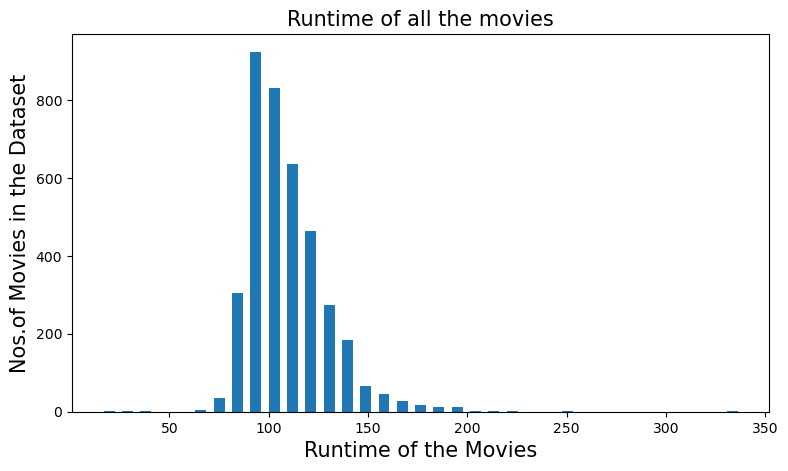

In [222]:
# Plotting the histogram for runtime 

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df_movie['runtime'], rwidth = 0.6, bins = 35)
#displays the plot
plt.show()

Amalysing the above histogram, we can conclude that runtime of movie is skewed towards right/ positively skewed. Further, we analyse it more with boxplot. 

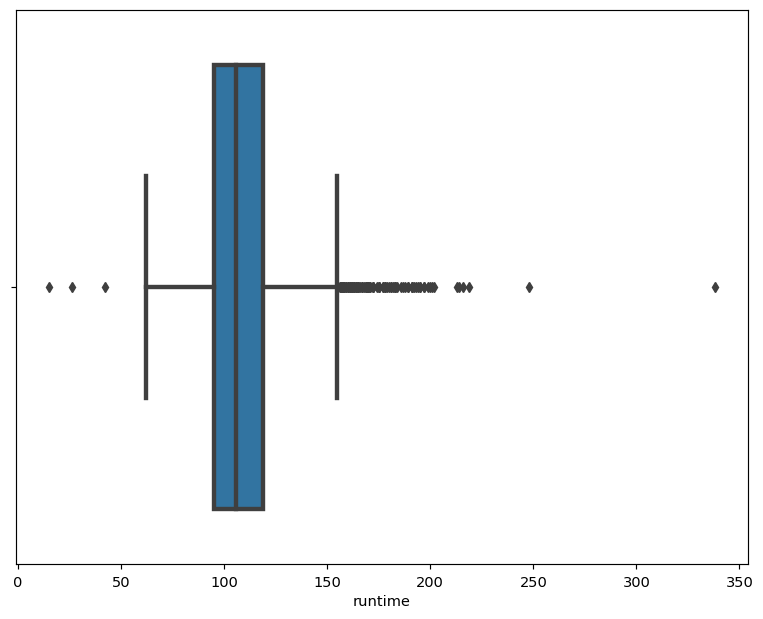

In [227]:
import seaborn as sns

#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df_movie['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

### 8. Most famous cast 

In [232]:
count = data('cast')
#printing top 5 values
print(count.head())
print("Famous director in the dataset is....",count.idxmax())

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64
Famous director in the dataset is.... Robert De Niro


### 9. Average budget and revenue of the movies

In [237]:
print("Average budget of movies....",df_movie['budget'].mean(),'\n')

print("Average revenue of movies....",df_movie['revenue'].mean())

Average budget of movies.... 37248859.98025461 

Average revenue of movies.... 107814811.610808


## Conclusion

**An interesting data to work upon. Analysing TMdb- movie data set using different techniques graphically as well as numerically. We can conclude as:**

1. The highest grossing movie was AVATAR with an 'action' genre. The budget was nearly half of the profit of this movie released in 2009. 

2. To make a movie profitable, the average budget should be around 3 million.

3. Most famous cast to make it to grossing movies were Robert De Niro, Bruce Willis and Samuel L. Jackson.

4. Average runtime of successful movies should be approc 110 minutes.

5. Favourite genres of the audience are more of comedy, drama, thriller and action. 

**Limitation of the dataset is that random movies of the year are taken in the dataset. We have dropped few rows. The analysis might not be error-free as well as the data might not be up-to dat and wrong.** 

